In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']    
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_labels))

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


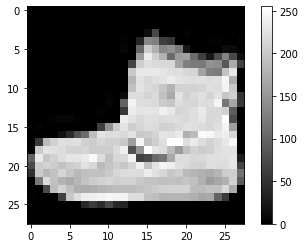

In [3]:
plt.figure()
plt.imshow(train_images[0],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

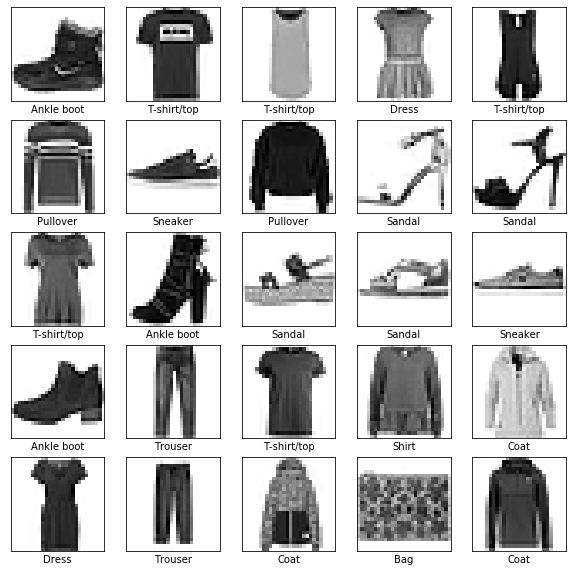

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # diff between actual and probabilities
              metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=15) # less epochs means UF , more epochs means OF

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2439 - acc: 0.9100
Epoch 2/15
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2359 - acc: 0.9129
Epoch 3/15
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2280 - acc: 0.9150
Epoch 4/15
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2206 - acc: 0.9174
Epoch 5/15
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2121 - acc: 0.9202
Epoch 6/15
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2080 - acc: 0.9223
Epoch 7/15
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2020 - acc: 0.9240
Epoch 8/15
60000/60000 [==============================] - 4s 63us/sample - loss: 0.1973 - acc: 0.9269
Epoch 9/15
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1917 - acc: 0.9283
Epoch 10/15
60000/60000 [==============================] - 

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


10000/10000 [==============================] - 0s 30us/sample - loss: 0.3651 - acc: 0.8902
Test accuracy: 0.8902


In [13]:
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

[4.83651442e-14 1.73671892e-14 6.61489364e-14 1.54927637e-17
 1.21377301e-12 2.52424883e-07 1.18557525e-11 4.27652776e-05
 2.54122049e-12 9.99956965e-01]
9
9


In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)



In [0]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


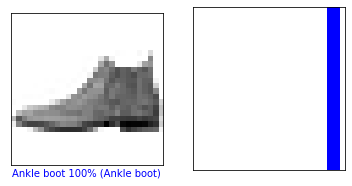

In [42]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

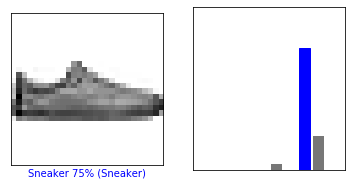

In [43]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

In [25]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(200,200))

<Figure size 14400x14400 with 0 Axes>

<Figure size 14400x14400 with 0 Axes>

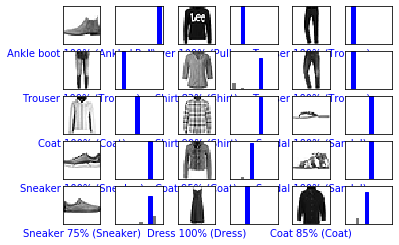

In [26]:
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [50]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [51]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [52]:
predictions_single = model.predict(img)

print(predictions_single)

[[4.8365236e-14 1.7367255e-14 6.6148557e-14 1.5492764e-17 1.2137754e-12
  2.5242466e-07 1.1855707e-11 4.2765238e-05 2.5412105e-12 9.9995697e-01]]


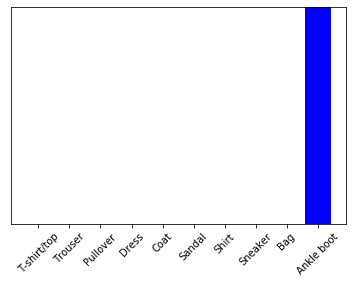

In [53]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [54]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9
